In [1]:
import config
import helpers

import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline

#Plotly Dash components 
import jupyterlab_dash
import dash
import dash_core_components as dcc
import dash_html_components as html
external_stylesheets = ['https://codepen.io/gullpavon1/pen/bGVWQEr.css']

#Connect to Federal Reserve Economic Data
fred = Fred(api_key=config.fred_api_code)

#Search for FRED data
#fred.search('mortgage').T


In [2]:

MORTGAGE30US = fred.get_series_all_releases('MORTGAGE30US')
MORTGAGE30US = MORTGAGE30US[MORTGAGE30US.date >= '2020-01-01']


In [3]:
#Dash App
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='MORTGAGE30US_GRAPH',
        figure={
            'data': [
                 {
                                "x": MORTGAGE30US['date'],
                                "y": MORTGAGE30US['value'],
                                "mode": "lines+markers",
                                "name": 'mortgage 30 yr rate',
                            }
            ],
            'layout': {
                'title': '30 YR MORTGAGE RATES',
                "paper_bgcolor": "rgb(46, 54, 65)",
                "plot_bgcolor": "rgb(46, 54, 65)",
                'font': {
                    'color': "rgb(255,255,255)"
                }
            }
        }
    )







])

if __name__ == '__main__':
    app.run_server(debug=False)

SyntaxError: invalid syntax (<ipython-input-3-c8d09861ee4a>, line 26)

In [4]:

MORTGAGE30US = fred.get_series_all_releases('MORTGAGE30US')
MORTGAGE30US = MORTGAGE30US[MORTGAGE30US.date >= '2020-01-01']



Text(0, 0.5, 'Rate')

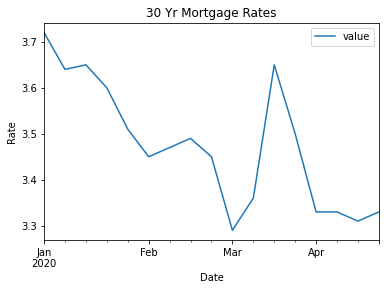

In [5]:
#30 Yr Mortgage Rates
MORTGAGE30US.plot.line(x='date', y='value')
plt.title ('30 Yr Mortgage Rates')
plt.xlabel ('Date')
plt.ylabel ('Rate')


Text(0, 0.5, 'Rate')

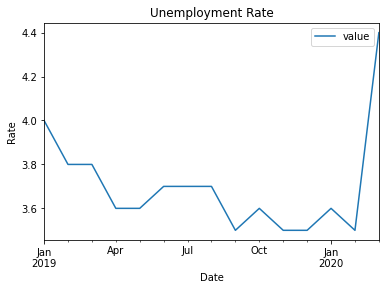

In [6]:

#Unemployment Rate
#For Unemployment number use: UNEMPLOY
UNRATE = fred.get_series_all_releases('UNRATE')
UNRATE = UNRATE[UNRATE.date >= '2019-01-01']

UNRATE.plot.line(x='date', y='value')
plt.title ('Unemployment Rate')
plt.xlabel ('Date')
plt.ylabel ('Rate')

Text(0, 0.5, 'Rate')

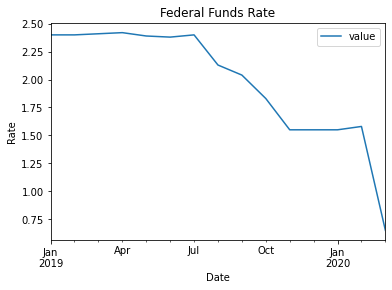

In [7]:


#Fed Funds Rate
FEDFUNDS = fred.get_series_all_releases('FEDFUNDS')
FEDFUNDS = FEDFUNDS[FEDFUNDS.date >= '2019-01-01']

FEDFUNDS.plot.line(x='date', y='value')
plt.title ('Federal Funds Rate')
plt.xlabel ('Date')
plt.ylabel ('Rate')

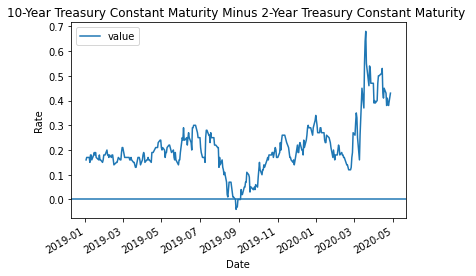

In [8]:

#10-2 Treasury Yield Spread
T10Y2Y = fred.get_series_all_releases('T10Y2Y')
T10Y2Y = T10Y2Y[T10Y2Y.date >= '2019-01-01']
T10Y2Y.dropna(inplace= True)

T10Y2Y.plot.line(x='date', y='value')
plt.title ('10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity ')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')

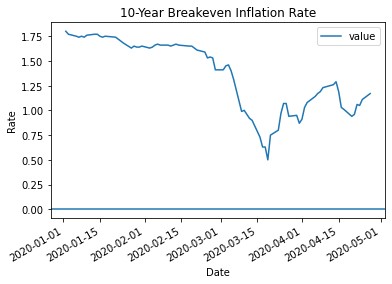

In [9]:
#10-2 Treasury Yield Spread
T10YIE = fred.get_series_all_releases('T10YIE')
T10YIE = T10YIE[T10YIE.date >= '2020-01-01']
T10YIE.dropna(inplace= True)


T10YIE.plot.line(x='date', y='value')
plt.title ('10-Year Breakeven Inflation Rate')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')


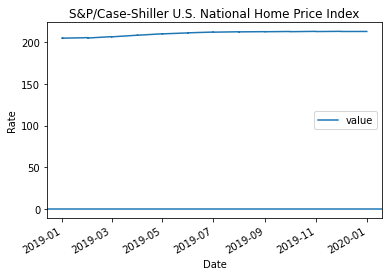

In [10]:

CSUSHPINSA = fred.get_series_all_releases('CSUSHPINSA')
CSUSHPINSA = CSUSHPINSA[CSUSHPINSA.date >= '2019-01-01']
CSUSHPINSA.dropna(inplace= True)
CSUSHPINSA.plot.line(x='date', y='value')

plt.title ('S&P/Case-Shiller U.S. National Home Price Index')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')

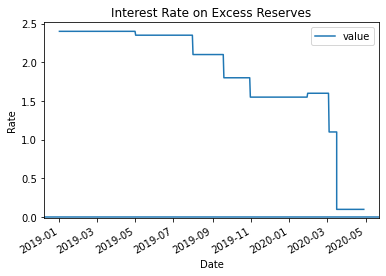

In [11]:

IOER = fred.get_series_all_releases('IOER')
IOER = IOER[IOER.date >= '2019-01-01']
IOER.dropna(inplace= True)
IOER.plot.line(x='date', y='value')

plt.title ('Interest Rate on Excess Reserves')
plt.xlabel ('Date')
plt.ylabel ('Rate')
plt.axhline(0, 0, 1, label='0')

In [12]:
 """Bank Prime Loan Rate (MPRIME)
 Existing Home Sales (EXHOSLUSM495S)
 Monthly Supply of Houses in the United States (MSACSR)
 Real Gross Domestic Product (GDPC1)
 10-Year Treasury Constant Maturity Rate (DGS10)"""

'Bank Prime Loan Rate (MPRIME)\nExisting Home Sales (EXHOSLUSM495S)\nMonthly Supply of Houses in the United States (MSACSR)\nReal Gross Domestic Product (GDPC1)\n10-Year Treasury Constant Maturity Rate (DGS10)'